# Cirrhosis Prediction: A Machine Learning Approach

---



---



---



## Introduction

---



---



### Background



**This notebook aims to predict cirrhosis outcomes using machine learning techniques**


# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Data Upload

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
!ls

drive  sample_data  train.csv


#Dataset

In [ ]:
cirrhosis_data = pd.read_csv('/content/train.csv')

In [ ]:
cirrhosis_data

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D


In [ ]:
cirrhosis_data.isna().sum(axis=0)

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [ ]:
cirrhosis_data.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

#Data Description

In [ ]:
cirrhosis_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,7905.0,3952.000000,2282.121272,0.00,1976.00,3952.00,5928.00,7904.00
N_Days,7905.0,2030.173308,1094.233744,41.00,1230.00,1831.00,2689.00,4795.00
Age,7905.0,18373.146490,3679.958739,9598.00,15574.00,18713.00,20684.00,28650.00
Bilirubin,7905.0,2.594485,3.812960,0.30,0.70,1.10,3.00,28.00
Cholesterol,7905.0,350.561923,195.379344,120.00,248.00,298.00,390.00,1775.00
Albumin,7905.0,3.548323,0.346171,1.96,3.35,3.58,3.77,4.64
Copper,7905.0,83.902846,75.899266,4.00,39.00,63.00,102.00,588.00
Alk_Phos,7905.0,1816.745250,1903.750657,289.00,834.00,1181.00,1857.00,13862.40
SGOT,7905.0,114.604602,48.790945,26.35,75.95,108.50,137.95,457.25
Tryglicerides,7905.0,115.340164,52.530402,33.00,84.00,104.00,139.00,598.00


In [ ]:
cirrhosis_data.shape

(7905, 20)

In [ ]:
cirrhosis_data.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [ ]:
cirrhosis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

#Exploratory Data Analysis

##N_Days

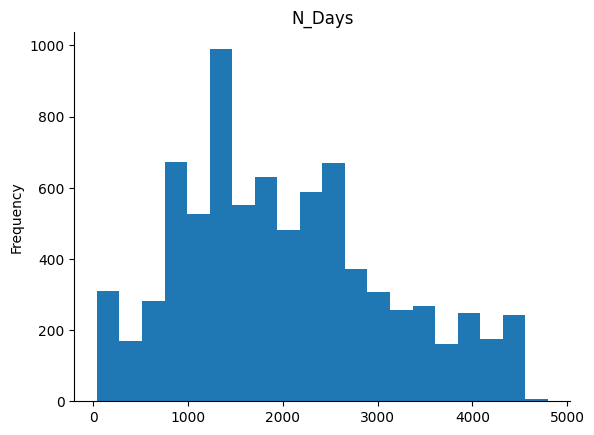

In [ ]:
cirrhosis_data['N_Days'].plot(kind='hist', bins=20, title='N_Days')
plt.gca().spines[['top', 'right',]].set_visible(False)

##Drug

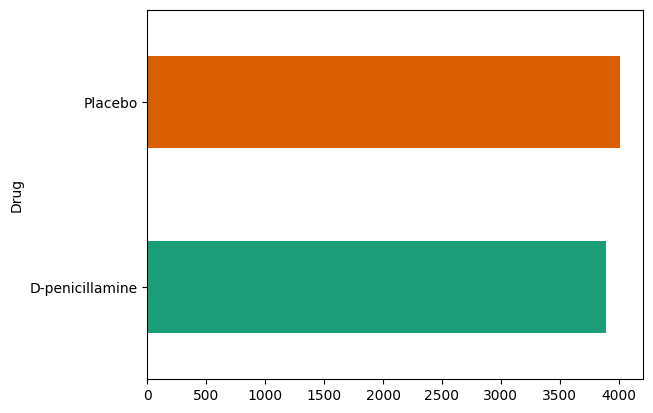

In [ ]:
cirrhosis_data.groupby('Drug').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(True)

##Age

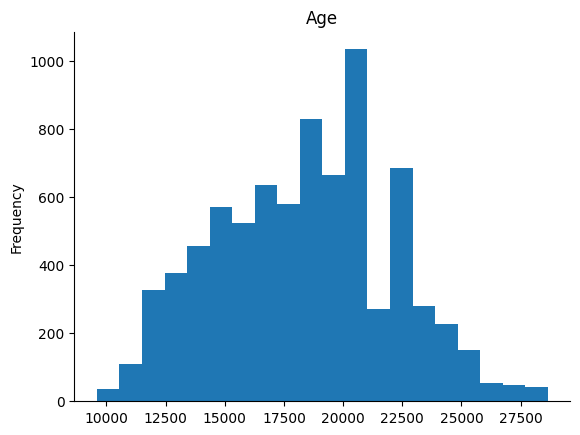

In [ ]:
cirrhosis_data['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

##Sex

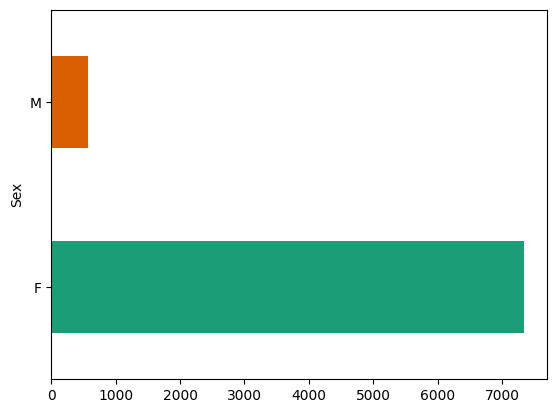

In [ ]:
cirrhosis_data.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(True)

##Ascites

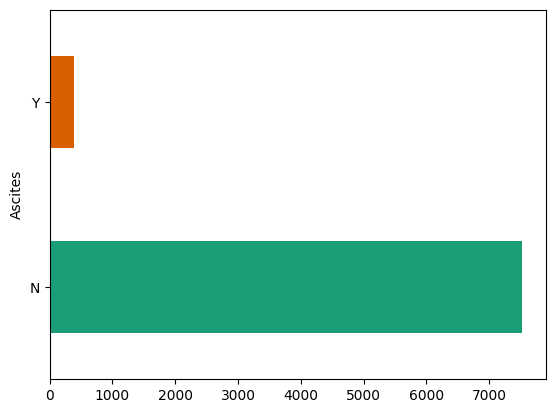

In [ ]:
cirrhosis_data.groupby('Ascites').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(True)

##Hepatomegaly

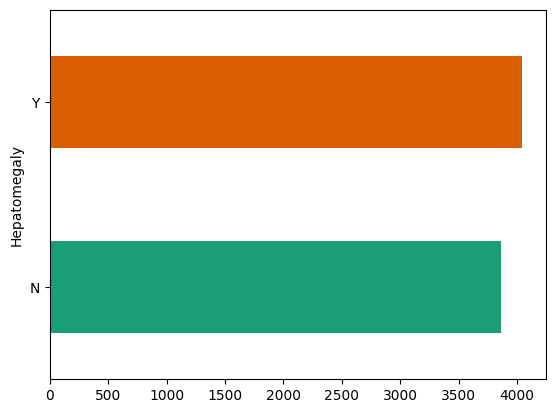

In [ ]:
cirrhosis_data.groupby('Hepatomegaly').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(True)

##Spiders

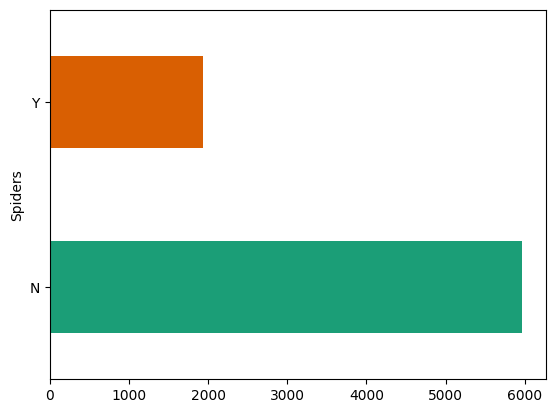

In [ ]:
cirrhosis_data.groupby('Spiders').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(True)

##Edema

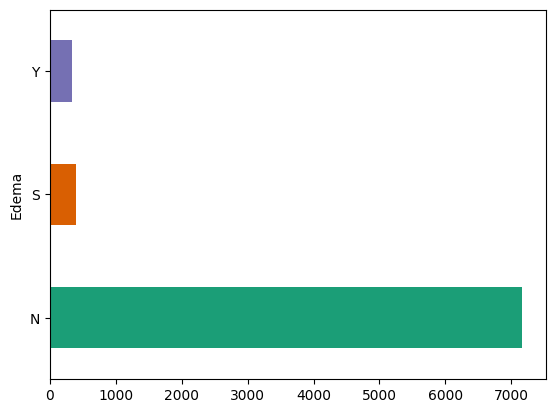

In [ ]:
cirrhosis_data.groupby('Edema').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(True)

##Bilirubin

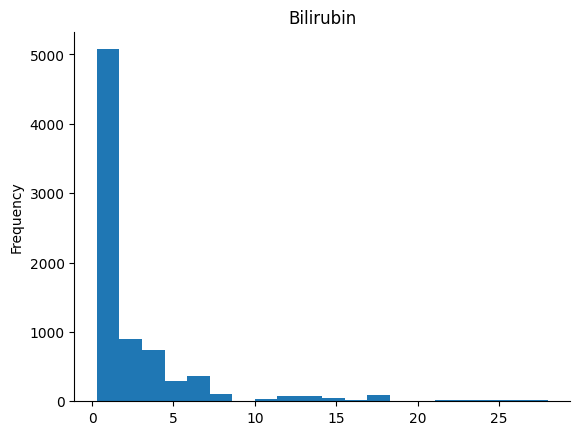

In [ ]:
cirrhosis_data['Bilirubin'].plot(kind='hist', bins=20, title='Bilirubin')
plt.gca().spines[['top', 'right',]].set_visible(False)

##Cholesterol

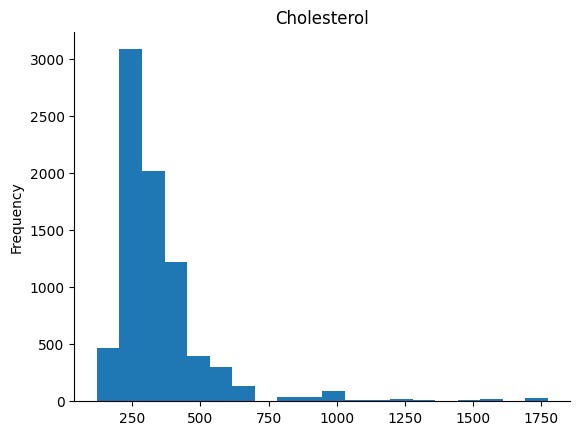

In [ ]:
cirrhosis_data['Cholesterol'].plot(kind='hist', bins=20, title='Cholesterol')
plt.gca().spines[['top', 'right',]].set_visible(False)

##Albumin

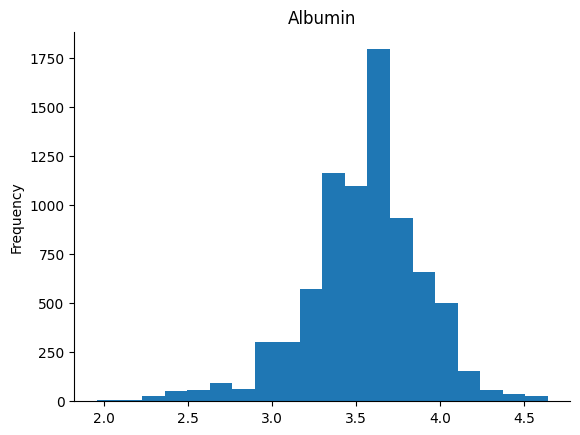

In [ ]:
cirrhosis_data['Albumin'].plot(kind='hist', bins=20, title='Albumin')
plt.gca().spines[['top', 'right',]].set_visible(False)

##Copper

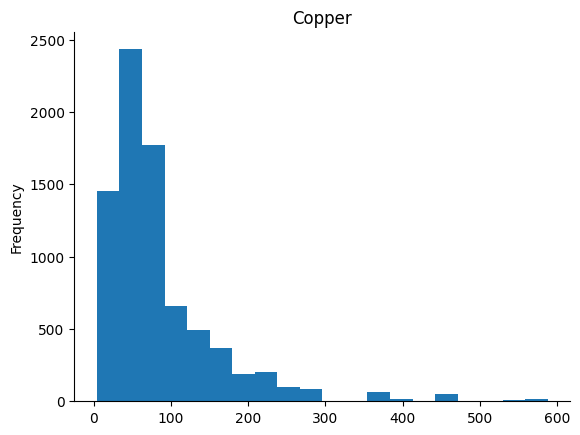

In [ ]:
cirrhosis_data['Copper'].plot(kind='hist', bins=20, title='Copper')
plt.gca().spines[['top', 'right',]].set_visible(False)

##Alk_Phos

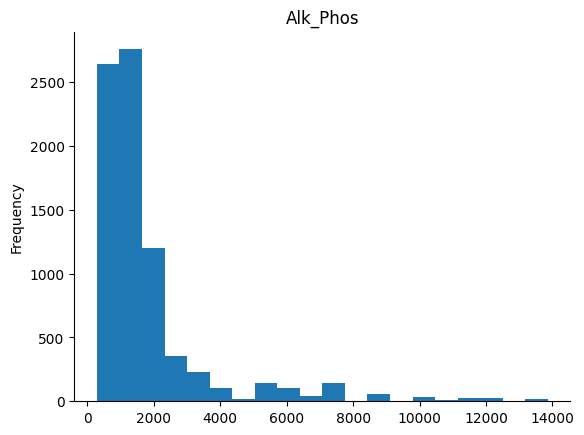

In [ ]:
cirrhosis_data['Alk_Phos'].plot(kind='hist', bins=20, title='Alk_Phos')
plt.gca().spines[['top', 'right',]].set_visible(False)

##SGOT

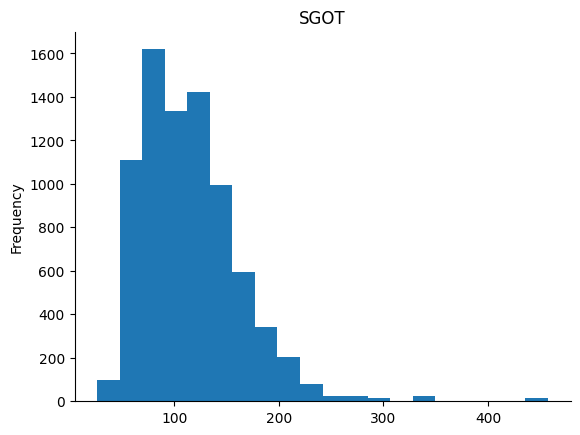

In [ ]:
cirrhosis_data['SGOT'].plot(kind='hist', bins=20, title='SGOT')
plt.gca().spines[['top', 'right',]].set_visible(False)

##Triglycerides

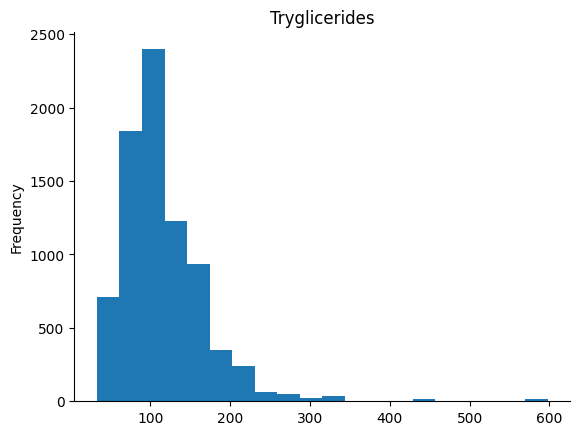

In [ ]:
cirrhosis_data['Tryglicerides'].plot(kind='hist', bins=20, title='Tryglicerides')
plt.gca().spines[['top', 'right',]].set_visible(False)

##Platelets

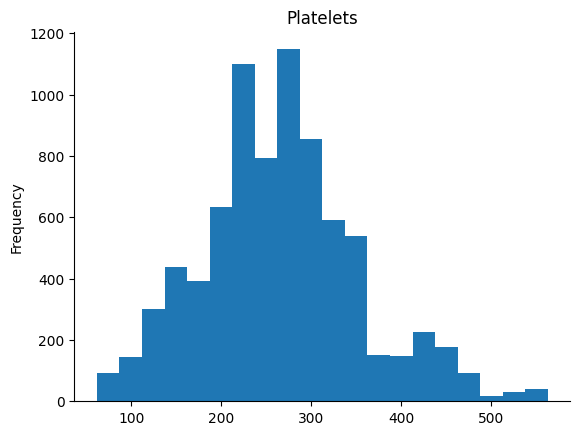

In [ ]:
cirrhosis_data['Platelets'].plot(kind='hist', bins=20, title='Platelets')
plt.gca().spines[['top', 'right',]].set_visible(False)

##Prothrombin

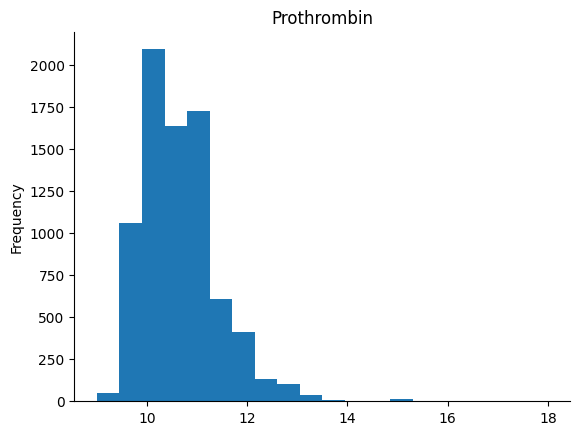

In [ ]:
cirrhosis_data['Prothrombin'].plot(kind='hist', bins=20, title='Prothrombin')
plt.gca().spines[['top', 'right',]].set_visible(False)

##Stage

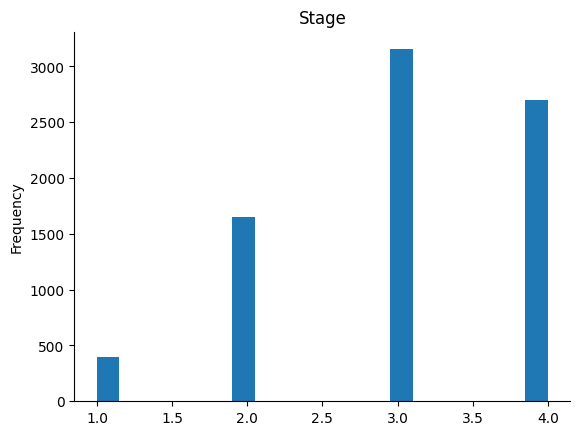

In [ ]:
cirrhosis_data['Stage'].plot(kind='hist', bins=20, title='Stage')
plt.gca().spines[['top', 'right',]].set_visible(False)

##Status

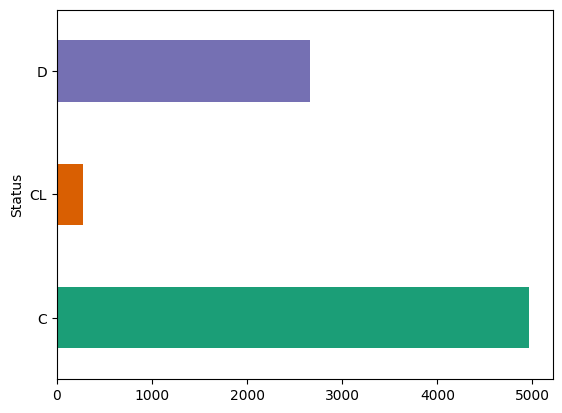

In [ ]:
cirrhosis_data.groupby('Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(True)

#Data Filtered by Sex


---



##All Records

In [ ]:
cirrhosis_data_shuffled = cirrhosis_data.sample(frac=1).reset_index(drop=True)
cirrhosis_data_shuffled

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,1213,1435,Placebo,12816,F,N,N,N,N,0.7,373.0,3.46,44.0,674.0,43.40,133.0,181.0,10.0,3.0,C
1,2326,2689,Placebo,14899,M,Y,Y,Y,Y,3.2,263.0,3.35,102.0,1273.0,119.35,119.0,268.0,11.5,3.0,C
2,538,2456,Placebo,18499,F,N,Y,N,N,1.3,364.0,3.63,52.0,1812.0,133.30,164.0,327.0,9.9,3.0,C
3,4855,4079,Placebo,18329,F,N,N,N,N,0.9,353.0,4.08,53.0,1768.0,130.20,59.0,340.0,10.9,2.0,D
4,5404,3336,D-penicillamine,16463,F,N,Y,Y,N,1.4,458.0,3.61,73.0,1080.0,106.95,91.0,195.0,11.4,3.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,5612,3820,Placebo,20597,F,N,Y,N,N,3.2,332.0,3.33,159.0,1428.0,134.00,137.0,344.0,10.6,4.0,CL
7901,5335,2050,D-penicillamine,19221,F,N,N,N,N,8.4,558.0,3.99,280.0,967.0,89.90,309.0,273.0,11.0,2.0,D
7902,5201,2721,Placebo,11058,M,N,Y,N,N,2.0,456.0,3.26,94.0,5719.0,221.88,113.0,330.0,9.6,2.0,C
7903,7255,4556,Placebo,17850,F,N,N,N,N,1.1,361.0,3.64,36.0,5430.2,67.08,56.0,203.0,10.6,2.0,C


##Male Records

In [ ]:
cirrhosis_male_data = cirrhosis_data[cirrhosis_data['Sex'] == 'M'].sample(frac=1).reset_index(drop=True)
cirrhosis_male_data

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,2083,611,Placebo,26259,M,N,Y,N,S,2.0,420.0,3.26,62.0,3196.0,77.50,91.0,344.0,11.4,3.0,C
1,6145,1363,Placebo,16467,M,N,N,N,N,6.4,478.0,4.38,130.0,2201.0,185.00,193.0,207.0,9.5,2.0,C
2,7787,980,D-penicillamine,18713,M,N,Y,N,N,7.1,374.0,3.74,103.0,979.0,128.65,100.0,266.0,11.1,2.0,D
3,1711,1657,D-penicillamine,27220,M,N,Y,N,N,5.0,514.0,3.12,77.0,2520.0,92.00,114.0,309.0,10.9,2.0,C
4,408,2563,Placebo,12839,M,N,N,N,N,1.0,364.0,4.16,43.0,369.0,74.00,93.0,165.0,10.7,3.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,886,552,Placebo,18799,M,N,Y,N,N,2.3,178.0,3.00,145.0,746.0,178.25,139.0,119.0,12.0,3.0,D
565,1885,515,D-penicillamine,19817,M,N,N,Y,N,0.8,325.0,3.98,444.0,766.0,130.20,210.0,344.0,9.6,3.0,D
566,4832,4256,D-penicillamine,19470,M,N,N,N,N,1.8,1600.0,3.34,82.0,2656.0,82.15,174.0,311.0,10.1,2.0,C
567,1098,1765,D-penicillamine,28650,M,Y,Y,N,N,7.1,243.0,3.26,380.0,983.0,158.10,154.0,299.0,11.2,3.0,C


##Female Records


In [ ]:
cirrhosis_female_data = cirrhosis_data[cirrhosis_data['Sex'] == 'F'].sample(frac=1).reset_index(drop=True)
cirrhosis_female_data

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,6371,3422,Placebo,15574,F,N,N,N,N,0.7,303.0,4.19,81.0,1584.0,111.60,111.0,306.0,10.3,2.0,C
1,6705,2769,Placebo,18713,F,N,N,N,N,1.2,277.0,3.37,29.0,1065.0,125.55,56.0,410.0,10.6,3.0,C
2,2574,1682,D-penicillamine,17738,F,N,N,N,N,0.7,256.0,3.63,13.0,858.0,65.10,64.0,309.0,9.6,3.0,C
3,4922,1592,D-penicillamine,14872,F,N,N,N,N,2.3,392.0,3.74,24.0,1395.0,184.45,100.0,328.0,10.9,3.0,C
4,6784,737,D-penicillamine,14558,F,N,Y,N,N,2.0,356.0,4.00,172.0,758.0,182.90,171.0,156.0,10.6,3.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7331,3589,1810,D-penicillamine,23585,F,N,Y,Y,N,0.5,288.0,3.61,116.0,976.0,57.35,114.0,322.0,11.0,4.0,D
7332,4387,1418,Placebo,17738,F,N,N,N,N,1.3,291.0,3.44,75.0,1082.0,85.00,195.0,251.0,9.5,1.0,C
7333,7319,4196,Placebo,20284,F,N,Y,N,N,1.1,248.0,3.37,41.0,1243.0,75.95,84.0,156.0,11.8,4.0,C
7334,4806,140,D-penicillamine,25772,F,Y,Y,Y,S,6.6,243.0,2.64,156.0,3074.0,167.40,90.0,102.0,12.0,4.0,D


#Feature Engineering

##Encoding

In [ ]:
#One Hot Encoding - cos no inherent order
#low cardinality (data categorical features has 3 class labels max)
#it is said that one column shoul be dropped to avoid multicollinearity, but https://inmachineswetrust.com/posts/drop-first-columns/ said differently.

categorical_columns = ['Edema']

encoded_columns_1 = pd.get_dummies(cirrhosis_data_shuffled[categorical_columns], dtype=int)
encoded_columns_2 = pd.get_dummies(cirrhosis_female_data[categorical_columns], dtype=int)
encoded_columns_3 = pd.get_dummies(cirrhosis_male_data[categorical_columns], dtype=int)


In [ ]:
#concatenation

cirrhosis_data_shuffled_encoded = pd.concat([cirrhosis_data_shuffled, encoded_columns_1], axis = 1)
cirrhosis_female_data_encoded = pd.concat([cirrhosis_female_data, encoded_columns_2], axis = 1)
cirrhosis_male_data_encoded = pd.concat([cirrhosis_male_data, encoded_columns_3], axis = 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Define categorical columns to encode
categorical_columns = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Status']

# Encode each categorical column and attach the encoded variables to the DataFrame
for col in categorical_columns:
    # Encode the column
    encoded_labels = label_encoder.fit_transform(cirrhosis_data_shuffled_encoded[col])

    # Attach the encoded variables to the DataFrame
    cirrhosis_data_shuffled_encoded[col + '_encoded'] = encoded_labels

# Now, the encoded variables are attached to the DataFrame as new columns


In [ ]:
# Create a dictionary to store label encoding mappings for each column
label_mappings = {}

# Encode each categorical column and store the mappings
for col in categorical_columns:
    # Encode the column
    encoded_labels = label_encoder.fit_transform(cirrhosis_data_shuffled_encoded[col])

    # Store the mapping of original labels to encoded numbers
    label_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print label encoding mappings for each column
for col, mapping in label_mappings.items():
    print(f"Label Encoding Mapping for '{col}':")
    print(mapping)
    print()

Label Encoding Mapping for 'Drug':
{'D-penicillamine': 0, 'Placebo': 1}

Label Encoding Mapping for 'Sex':
{'F': 0, 'M': 1}

Label Encoding Mapping for 'Ascites':
{'N': 0, 'Y': 1}

Label Encoding Mapping for 'Hepatomegaly':
{'N': 0, 'Y': 1}

Label Encoding Mapping for 'Spiders':
{'N': 0, 'Y': 1}

Label Encoding Mapping for 'Status':
{'C': 0, 'CL': 1, 'D': 2}



In [ ]:
categorical_columns = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Status']

# Encode each categorical column and attach the encoded variables to the DataFrame
for col in categorical_columns:
    # Encode the column
    encoded_labels = label_encoder.fit_transform(cirrhosis_female_data_encoded[col])

    # Attach the encoded variables to the DataFrame
    cirrhosis_female_data_encoded[col + '_encoded'] = encoded_labels

In [ ]:
categorical_columns = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',  'Status']

# Encode each categorical column and attach the encoded variables to the DataFrame
for col in categorical_columns:
    # Encode the column
    encoded_labels = label_encoder.fit_transform(cirrhosis_male_data_encoded[col])

    # Attach the encoded variables to the DataFrame
    cirrhosis_male_data_encoded[col + '_encoded'] = encoded_labels

In [ ]:
cirrhosis_data_shuffled_encoded.head(5)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,Status,Edema_N,Edema_S,Edema_Y,Drug_encoded,Sex_encoded,Ascites_encoded,Hepatomegaly_encoded,Spiders_encoded,Status_encoded
0,1213,1435,Placebo,12816,F,N,N,N,N,0.7,...,C,1,0,0,1,0,0,0,0,0
1,2326,2689,Placebo,14899,M,Y,Y,Y,Y,3.2,...,C,0,0,1,1,1,1,1,1,0
2,538,2456,Placebo,18499,F,N,Y,N,N,1.3,...,C,1,0,0,1,0,0,1,0,0
3,4855,4079,Placebo,18329,F,N,N,N,N,0.9,...,D,1,0,0,1,0,0,0,0,2
4,5404,3336,D-penicillamine,16463,F,N,Y,Y,N,1.4,...,D,1,0,0,0,0,0,1,1,2


In [ ]:
cirrhosis_female_data_encoded.head(5)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,Status,Edema_N,Edema_S,Edema_Y,Drug_encoded,Sex_encoded,Ascites_encoded,Hepatomegaly_encoded,Spiders_encoded,Status_encoded
0,6371,3422,Placebo,15574,F,N,N,N,N,0.7,...,C,1,0,0,1,0,0,0,0,0
1,6705,2769,Placebo,18713,F,N,N,N,N,1.2,...,C,1,0,0,1,0,0,0,0,0
2,2574,1682,D-penicillamine,17738,F,N,N,N,N,0.7,...,C,1,0,0,0,0,0,0,0,0
3,4922,1592,D-penicillamine,14872,F,N,N,N,N,2.3,...,C,1,0,0,0,0,0,0,0,0
4,6784,737,D-penicillamine,14558,F,N,Y,N,N,2.0,...,D,1,0,0,0,0,0,1,0,2


In [ ]:
cirrhosis_male_data_encoded.head(5)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,Status,Edema_N,Edema_S,Edema_Y,Drug_encoded,Sex_encoded,Ascites_encoded,Hepatomegaly_encoded,Spiders_encoded,Status_encoded
0,2083,611,Placebo,26259,M,N,Y,N,S,2.0,...,C,0,1,0,1,0,0,1,0,0
1,6145,1363,Placebo,16467,M,N,N,N,N,6.4,...,C,1,0,0,1,0,0,0,0,0
2,7787,980,D-penicillamine,18713,M,N,Y,N,N,7.1,...,D,1,0,0,0,0,0,1,0,2
3,1711,1657,D-penicillamine,27220,M,N,Y,N,N,5.0,...,C,1,0,0,0,0,0,1,0,0
4,408,2563,Placebo,12839,M,N,N,N,N,1.0,...,C,1,0,0,1,0,0,0,0,0


##Correlation

In [ ]:
cirrhosis_data_numeric = cirrhosis_data_shuffled_encoded.select_dtypes(include='number')

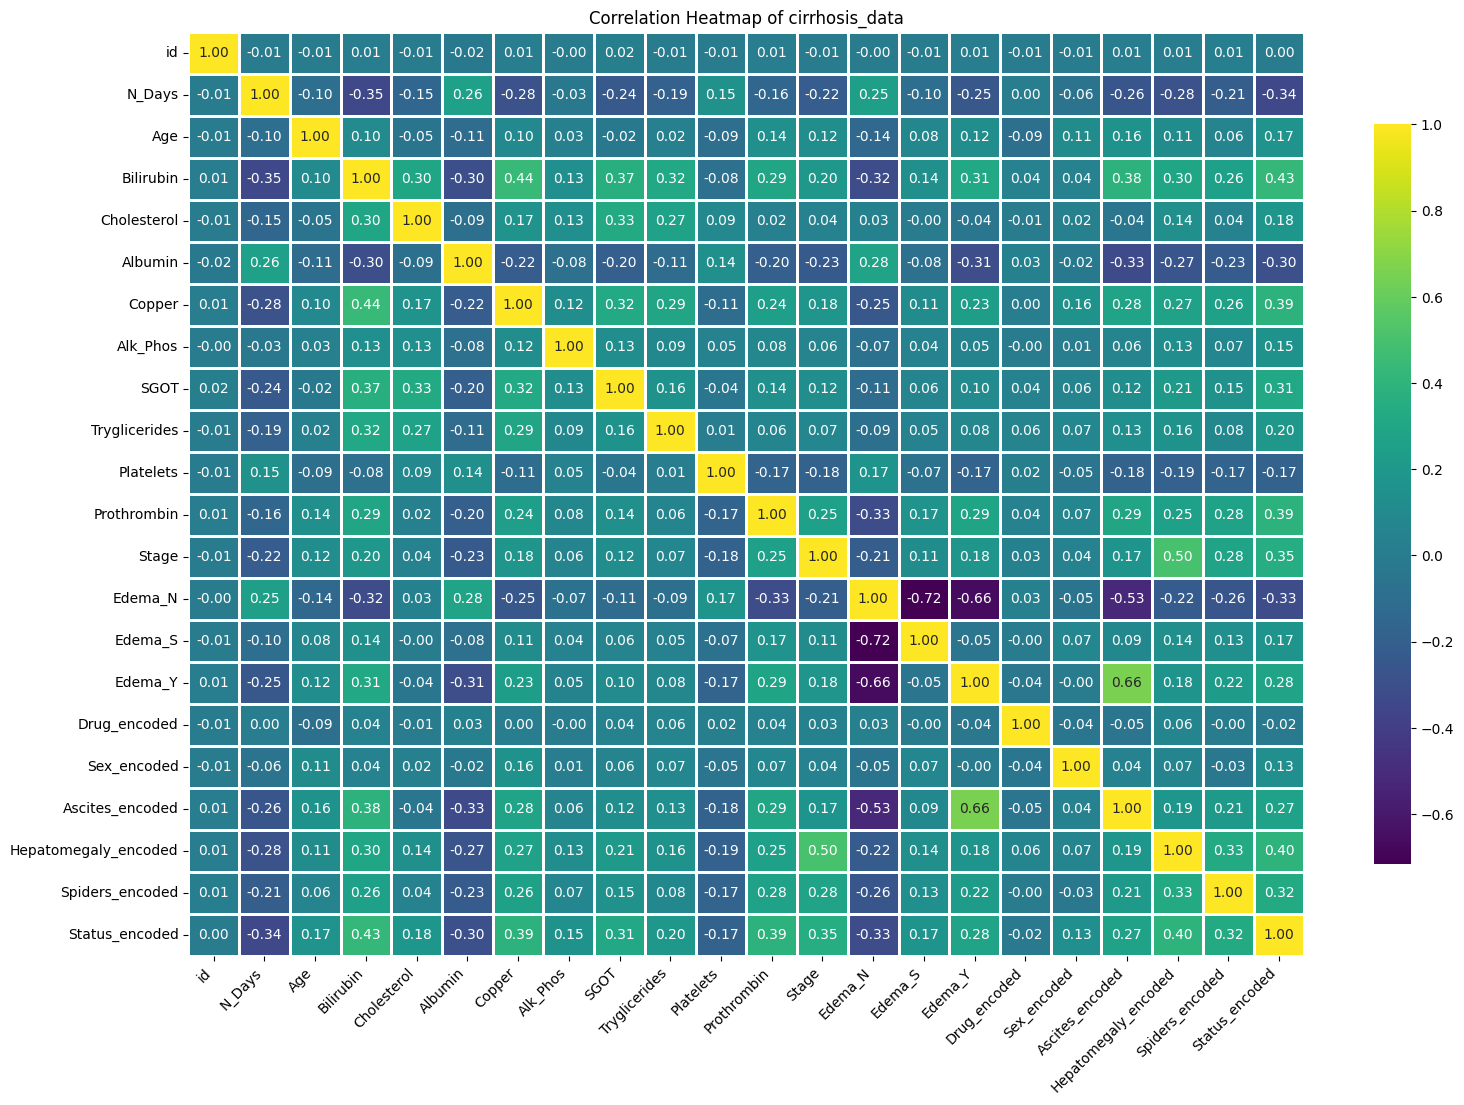

In [ ]:
correlation_matrix = cirrhosis_data_numeric.corr()

plt.figure(figsize=(18, 12))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=1, fmt='.2f',
                      annot_kws={"size": 10}, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of cirrhosis_data')

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
plt.show()

##Data Splitting

###All Records

####dropping categorical variables

In [ ]:
cirrhosis_data_shuffled_encoded.shape

(7905, 29)

In [ ]:
cirrhosis_data_shuffled_encoded.columns

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status', 'Edema_N', 'Edema_S', 'Edema_Y', 'Drug_encoded',
       'Sex_encoded', 'Ascites_encoded', 'Hepatomegaly_encoded',
       'Spiders_encoded', 'Status_encoded'],
      dtype='object')

In [ ]:
import pandas as pd

#categorical columns to be dropped
categorical_columns = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status']

# Drop the original categorical columns from cirrhosis_data_shuffled_encoded
cirrhosis_data_shuffled_encoded = cirrhosis_data_shuffled_encoded.drop(columns=categorical_columns)


In [ ]:
cirrhosis_data_shuffled_encoded.shape

(7905, 22)

####split

In [ ]:
features_a = ['id', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Edema_N', 'Edema_S', 'Edema_Y', 'Drug_encoded',
       'Sex_encoded', 'Ascites_encoded', 'Hepatomegaly_encoded',
       'Spiders_encoded']

target_a = ['Status_encoded']

In [ ]:
X = cirrhosis_data_shuffled_encoded[features_a]
y = cirrhosis_data_shuffled_encoded[target_a]

len(X)

7905

In [ ]:
# Split the data into 70% train and 30% test
train_set, temp_test_set =  train_test_split(cirrhosis_data_shuffled_encoded,
                                             test_size=0.3, random_state = 42)

print( train_set.shape )
print( temp_test_set.shape )

(5533, 22)
(2372, 22)


In [ ]:
# Split the test_dataset dataframe to 50% test and 50% validation.
test_set, val_set =  train_test_split(temp_test_set, test_size=0.5,
                                      random_state = 42)

print( test_set.shape )
print( val_set.shape )

(1186, 22)
(1186, 22)


In [ ]:
print(f" Train set      : {train_set.shape}")
print(f" Validation set : {val_set.shape}")
print(f" Test set       : {test_set.shape}")

 Train set      : (5533, 22)
 Validation set : (1186, 22)
 Test set       : (1186, 22)


In [ ]:
X_train = train_set.drop(columns=['Status_encoded', 'Edema_N', 'Edema_S', 'Edema_Y', 'Drug_encoded',
       'Sex_encoded', 'Ascites_encoded','Spiders_encoded', 'Hepatomegaly_encoded', 'Stage'])
X_val = val_set.drop(columns=['Status_encoded', 'Edema_N', 'Edema_S', 'Edema_Y', 'Drug_encoded',
       'Sex_encoded', 'Ascites_encoded','Spiders_encoded', 'Hepatomegaly_encoded', 'Stage'])
X_test = test_set.drop(columns=['Status_encoded', 'Edema_N', 'Edema_S', 'Edema_Y', 'Drug_encoded',
       'Sex_encoded', 'Ascites_encoded','Spiders_encoded', 'Hepatomegaly_encoded', 'Stage'])

In [ ]:
y_train = train_set[['Status_encoded']]
y_val = val_set[['Status_encoded']]
y_test = test_set[['Status_encoded']]

#### standardisation

In [ ]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,5533.0,3952.823242,2297.049438,0.00,1935.00,3961.00,5943.00,7904.00
N_Days,5533.0,2023.970721,1098.952262,41.00,1230.00,1831.00,2692.00,4795.00
Age,5533.0,18378.247425,3675.124385,9598.00,15574.00,18701.00,20684.00,28650.00
Bilirubin,5533.0,2.648961,3.921265,0.30,0.70,1.10,3.00,28.00
Cholesterol,5533.0,349.123803,194.166423,120.00,248.00,298.00,387.00,1775.00
Albumin,5533.0,3.545554,0.350367,1.96,3.35,3.58,3.77,4.64
Copper,5533.0,84.272547,76.093832,4.00,39.00,63.00,102.00,588.00
Alk_Phos,5533.0,1808.094090,1871.749732,289.00,824.00,1174.00,1857.00,13862.40
SGOT,5533.0,114.634536,49.744508,26.35,75.95,106.95,137.95,457.25
Tryglicerides,5533.0,116.233689,54.863903,33.00,85.00,104.00,139.00,598.00


In [ ]:
# Initialize the RobustScaler
scaler = RobustScaler()

X_train_norm = scaler.fit_transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

In [ ]:
# put normalised data in a df

X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns)
X_val_norm = pd.DataFrame(X_val_norm, columns=X_val.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns=X_test.columns)

In [ ]:
X_train_norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,5533.0,-0.002040,0.573116,-0.988273,-0.505489,0.0,0.494511,0.983782
N_Days,5533.0,0.131991,0.751677,-1.224350,-0.411081,0.0,0.588919,2.027360
Age,5533.0,-0.063161,0.719202,-1.781409,-0.611937,0.0,0.388063,1.946967
Bilirubin,5533.0,0.673461,1.704898,-0.347826,-0.173913,0.0,0.826087,11.695652
Cholesterol,5533.0,0.367797,1.396881,-1.280576,-0.359712,0.0,0.640288,10.625899
Albumin,5533.0,-0.082014,0.834208,-3.857143,-0.547619,0.0,0.452381,2.523810
Copper,5533.0,0.337659,1.207839,-0.936508,-0.380952,0.0,0.619048,8.333333
Alk_Phos,5533.0,0.613837,1.811955,-0.856728,-0.338819,0.0,0.661181,12.283059
SGOT,5533.0,0.123944,0.802331,-1.300000,-0.500000,0.0,0.500000,5.650000
Tryglicerides,5533.0,0.226550,1.015998,-1.314815,-0.351852,0.0,0.648148,9.148148


In [ ]:
X_val_norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,1186.0,-0.001200,0.554505,-0.987774,-0.469623,-0.016218,0.490020,0.983533
N_Days,1186.0,0.139316,0.744067,-1.224350,-0.420657,0.034884,0.562756,2.027360
Age,1186.0,-0.071771,0.736540,-1.781409,-0.617025,-0.039530,0.383757,1.946967
Bilirubin,1186.0,0.595425,1.532493,-0.347826,-0.173913,0.000000,0.826087,11.695652
Cholesterol,1186.0,0.444393,1.518490,-1.280576,-0.359712,0.000000,0.705036,10.625899
Albumin,1186.0,-0.060748,0.814219,-3.214286,-0.547619,0.047619,0.428571,2.523810
Copper,1186.0,0.304130,1.135277,-0.936508,-0.380952,0.007937,0.539683,7.857143
Alk_Phos,1186.0,0.635344,1.931772,-0.856728,-0.347531,-0.010649,0.669894,12.283059
SGOT,1186.0,0.130371,0.783990,-1.300000,-0.500000,0.050000,0.500000,5.650000
Tryglicerides,1186.0,0.171976,0.856963,-1.314815,-0.370370,-0.027778,0.638889,5.148148


In [ ]:
X_test_norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,1186.0,-0.004250,0.567111,-0.986527,-0.484968,0.004117,0.475923,0.982535
N_Days,1186.0,0.152944,0.738030,-1.217510,-0.407661,0.010944,0.571135,2.027360
Age,1186.0,-0.061205,0.708447,-1.781409,-0.608611,0.005871,0.381556,1.946967
Bilirubin,1186.0,0.593629,1.550747,-0.347826,-0.173913,0.000000,0.771739,11.695652
Cholesterol,1186.0,0.360161,1.325869,-1.280576,-0.330935,0.014388,0.721223,10.625899
Albumin,1186.0,-0.059343,0.786655,-3.119048,-0.517857,0.000000,0.428571,2.523810
Copper,1186.0,0.332075,1.257272,-0.936508,-0.396825,-0.015873,0.523810,8.333333
Alk_Phos,1186.0,0.648151,1.895836,-0.856728,-0.288480,0.034850,0.644724,12.283059
SGOT,1186.0,0.114299,0.714664,-1.300000,-0.450000,0.050000,0.480484,3.726613
Tryglicerides,1186.0,0.170836,0.868544,-1.314815,-0.370370,0.000000,0.611111,6.074074


## Feature Importance

In [ ]:
X_train.columns

Index(['id', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# X & y contains the feature and target variables from the train data respectively

X = X_train_norm[['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       ]]

      #  , 'Edema_N', 'Edema_S', 'Edema_Y', 'Drug_encoded', 'Sex_encoded',
      #  'Ascites_encoded',  'Spiders_encoded']]

y = y_train[['Status_encoded']]

# Split the training set into training and testing sets for feature importance check
X_train_fi, X_test_fi, y_train_fi, y_test_fi = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Random Forest model
feature_imp_model = RandomForestRegressor(n_estimators=100, random_state=42)
feature_imp_model.fit(X_train_fi, y_train_fi)

# Get feature importances
feature_importances = feature_imp_model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

<ipython-input-64-da1d538c1bd0>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  feature_imp_model.fit(X_train_fi, y_train_fi)


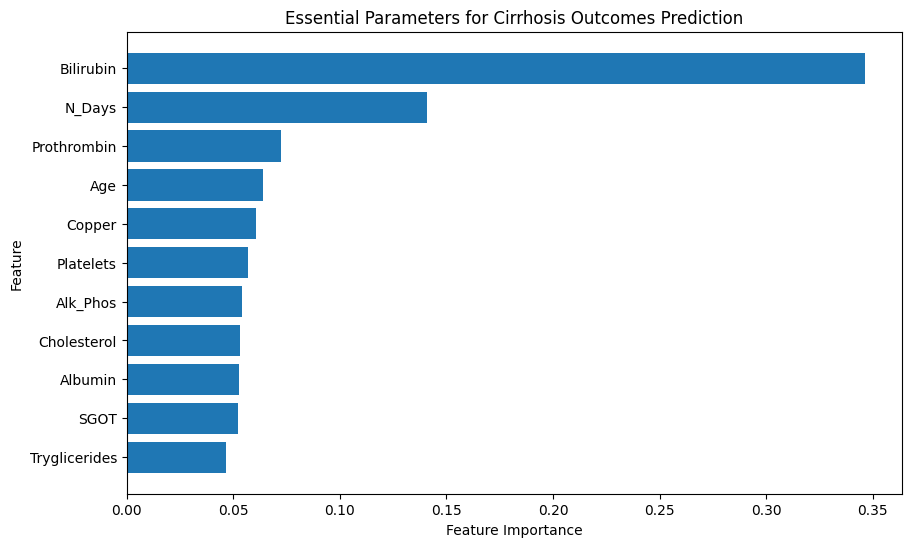

          Feature  Importance
2       Bilirubin    0.346246
0          N_Days    0.140897
10    Prothrombin    0.072215
1             Age    0.063915
5          Copper    0.060902
9       Platelets    0.057067
6        Alk_Phos    0.054025
3     Cholesterol    0.053096
4         Albumin    0.052689
7            SGOT    0.052435
8   Tryglicerides    0.046514


In [ ]:
# Sort the feature importance DataFrame in descending order of importance
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_sorted['Feature'], feature_importance_df_sorted['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Essential Parameters for Cirrhosis Outcomes Prediction')
plt.show()

# Display the sorted feature importance DataFrame
print(feature_importance_df)



#Model Training

* Naive Bayes (NB)
* K-nearest Neighbour (KNN)
* Decision Tree (DT)
* Random Forest (RF)
* Support Vector Machine (SVM)
* Logistic Regression (LR) Adaptive Boosting (AdaBoost)
* Extreme Gradient Boosting (XGBoost)
* Artificial Neural Network (ANN)

* Classification Metrics:

*  Accuracy: The proportion of correctly classified instances among all instances.
* Precision: The ratio of correctly predicted positive observations to the total predicted positives. It indicates the accuracy of positive predictions.
* Recall (Sensitivity): The ratio of correctly predicted positive observations to the total actual positives. It measures the ability of the classifier to find all the positive samples.
* Specificity: The ratio of correctly predicted negative observations to the total actual negatives. It measures the ability of the classifier to find all the negative samples.
* F1-score: The harmonic mean of precision and recall. It provides a single score that balances both precision and recall.
* ROC Curve and AUC: Receiver Operating Characteristic (ROC) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. Area Under the ROC Curve (AUC) represents the degree of separability between classes.
* Confusion Matrix: A table summarizing the performance of a classification algorithm, displaying counts of true positive, true negative, false positive, and false negative predictions.

In [ ]:
# Importing Naive Bayes (NB)
from sklearn.naive_bayes import BernoulliNB

# Importing K-nearest Neighbour (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Importing Decision Tree (DT)
from sklearn.tree import DecisionTreeClassifier

# Importing Random Forest (RF)
from sklearn.ensemble import RandomForestClassifier

# Importing Support Vector Machine (SVM)
from sklearn.svm import SVC

# Importing Logistic Regression (LR)
from sklearn.linear_model import LogisticRegression

# Importing Adaptive Boosting (AdaBoost)
from sklearn.ensemble import AdaBoostClassifier

# Importing Extreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from sklearn.model_selection import GridSearchCV

##All features

###Random Forest (RF)

In [ ]:
# Model Training
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_norm, y_train)

<ipython-input-69-0fd070780e84>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_norm, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
#Performance Evaluation on the Training Set
rf_train_pred = rf.predict(X_train_norm)

In [ ]:
print("Random Forest Evaluation (train set):")

# Calculate accuracy
accuracy = accuracy_score(y_train, rf_train_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_train, rf_train_pred, average='weighted')
recall = recall_score(y_train, rf_train_pred, average='weighted')
f1 = f1_score(y_train, rf_train_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_train, rf_train_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_train, rf_train_pred)
print("Classification Report:\n", class_report)

Random Forest Evaluation (train set):
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
 [[3459    0    0]
 [   0  199    0]
 [   0    0 1875]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3459
           1       1.00      1.00      1.00       199
           2       1.00      1.00      1.00      1875

    accuracy                           1.00      5533
   macro avg       1.00      1.00      1.00      5533
weighted avg       1.00      1.00      1.00      5533



In [ ]:
#Performance Evaluation on the validation Set
rf_val_pred = rf.predict(X_val_norm)

In [ ]:
print("Random Forest Evaluation (validation set):")

# Calculate accuracy
accuracy = accuracy_score(y_val, rf_val_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_val, rf_val_pred, average='weighted')
recall = recall_score(y_val, rf_val_pred, average='weighted')
f1 = f1_score(y_val, rf_val_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_val, rf_val_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_val, rf_val_pred)
print("Classification Report:\n", class_report)

Random Forest Evaluation (validation set):
Accuracy: 0.8330522765598651
Precision: 0.8261708819591371
Recall: 0.8330522765598651
F1-score: 0.8208531144716016
Confusion Matrix:
 [[707   1  54]
 [ 19   4  17]
 [106   1 277]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       762
           1       0.67      0.10      0.17        40
           2       0.80      0.72      0.76       384

    accuracy                           0.83      1186
   macro avg       0.77      0.58      0.61      1186
weighted avg       0.83      0.83      0.82      1186



####Hyperparameter tuning

In [ ]:
#Getting the hyperparameters


# param_grid = {
#     'n_estimators': [50, 100, 150, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10, 15],
#     'min_samples_leaf': [1, 2, 4, 8]
# }

# # # Perform Grid Search to find the best hyperparameters
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
# grid_search.fit(X_train_norm, y_train)

# # Print the best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)

In [ ]:
best_hyperparameters = {'max_depth': 20, 'min_samples_leaf': 2,
                        'min_samples_split': 5, 'n_estimators': 100}

# Retraining with best hyperparameters
rf_best = RandomForestClassifier(random_state=42, **best_hyperparameters)
rf_best.fit(X_train_norm, y_train)

<ipython-input-75-0b1b45fca8e3>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_best.fit(X_train_norm, y_train)


RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [ ]:
#Performance Evaluation on the Training Set
rf_val_best_pred = rf_best.predict(X_val_norm)

In [ ]:
print("Hyperparameter Tuned Random Forest Model Evaluation (validation set):")

# Calculate accuracy
accuracy = accuracy_score(y_val, rf_val_best_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_val, rf_val_best_pred, average='weighted')
recall = recall_score(y_val, rf_val_best_pred, average='weighted')
f1 = f1_score(y_val, rf_val_best_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_val, rf_val_best_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_val, rf_val_best_pred)
print("Classification Report:\n", class_report)

Hyperparameter Tuned Random Forest Model Evaluation (validation set):
Accuracy: 0.8338954468802698
Precision: 0.821870633963162
Recall: 0.8338954468802698
F1-score: 0.8195667772571634
Confusion Matrix:
 [[711   1  50]
 [ 21   2  17]
 [107   1 276]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       762
           1       0.50      0.05      0.09        40
           2       0.80      0.72      0.76       384

    accuracy                           0.83      1186
   macro avg       0.72      0.57      0.58      1186
weighted avg       0.82      0.83      0.82      1186



In [ ]:
# Evaluation on the test set

rf_test_pred = rf.predict(X_test_norm)

In [ ]:
print("Random Forest Model Evaluation (test set):")


# Calculate accuracy
accuracy = accuracy_score(y_test, rf_test_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_test, rf_test_pred, average='weighted')
recall = recall_score(y_test, rf_test_pred, average='weighted')
f1 = f1_score(y_test, rf_test_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_test, rf_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_test, rf_test_pred)
print("Classification Report:\n", class_report)

Random Forest Model Evaluation (test set):
Accuracy: 0.8086003372681282
Precision: 0.8120506904992956
Recall: 0.8086003372681282
F1-score: 0.7961937732443378
Confusion Matrix:
 [[682   0  62]
 [ 20   4  12]
 [133   0 273]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.86       744
           1       1.00      0.11      0.20        36
           2       0.79      0.67      0.73       406

    accuracy                           0.81      1186
   macro avg       0.87      0.57      0.60      1186
weighted avg       0.81      0.81      0.80      1186



In [ ]:
#using the hyperparameter tuned model

rf_test_pred_best = rf_best.predict(X_test_norm)

In [ ]:
print("Hyperparameter Tuned Random Forest Model Evaluation (test set):")


# Calculate accuracy
accuracy = accuracy_score(y_test, rf_test_pred_best)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_test, rf_test_pred_best, average='weighted')
recall = recall_score(y_test, rf_test_pred_best, average='weighted')
f1 = f1_score(y_test, rf_test_pred_best, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_test, rf_test_pred_best)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_test, rf_test_pred_best)
print("Classification Report:\n", class_report)

Hyperparameter Tuned Random Forest Model Evaluation (test set):
Accuracy: 0.8086003372681282
Precision: 0.8118446487182598
Recall: 0.8086003372681282
F1-score: 0.7963124428768859
Confusion Matrix:
 [[675   0  69]
 [ 21   3  12]
 [125   0 281]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       744
           1       1.00      0.08      0.15        36
           2       0.78      0.69      0.73       406

    accuracy                           0.81      1186
   macro avg       0.87      0.56      0.58      1186
weighted avg       0.81      0.81      0.80      1186



###Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_norm, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#Performance Evaluation on the Training Set
dt_train_pred = dt.predict(X_train_norm)

In [ ]:
print("Decision Evaluation (train set):")

# Calculate accuracy
accuracy = accuracy_score(y_train, dt_train_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_train, dt_train_pred, average='weighted')
recall = recall_score(y_train, dt_train_pred, average='weighted')
f1 = f1_score(y_train, dt_train_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_train, dt_train_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_train, dt_train_pred)
print("Classification Report:\n", class_report)

Decision Evaluation (train set):
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
 [[3459    0    0]
 [   0  199    0]
 [   0    0 1875]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3459
           1       1.00      1.00      1.00       199
           2       1.00      1.00      1.00      1875

    accuracy                           1.00      5533
   macro avg       1.00      1.00      1.00      5533
weighted avg       1.00      1.00      1.00      5533



In [ ]:
#Performance Evaluation on the Val Set
dt_val_pred = dt.predict(X_val_norm)

In [ ]:
print("DT Evaluation (validation set):")

# Calculate accuracy
accuracy = accuracy_score(y_val, dt_val_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_val, dt_val_pred, average='weighted')
recall = recall_score(y_val, dt_val_pred, average='weighted')
f1 = f1_score(y_val, dt_val_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_val, dt_val_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_val, dt_val_pred)
print("Classification Report:\n", class_report)

DT Evaluation (validation set):
Accuracy: 0.7335581787521079
Precision: 0.7419461658036058
Recall: 0.7335581787521079
F1-score: 0.7375039641301633
Confusion Matrix:
 [[611  25 126]
 [ 15   8  17]
 [114  19 251]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81       762
           1       0.15      0.20      0.17        40
           2       0.64      0.65      0.65       384

    accuracy                           0.73      1186
   macro avg       0.54      0.55      0.54      1186
weighted avg       0.74      0.73      0.74      1186



####hyp tuning

In [ ]:
# # Hyperparameter tuning using GridSearchCV
# param_grid = {
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
# }

# grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='accuracy', cv=3)
# grid_search.fit(X_train_norm, y_train)

# print("Best Hyperparameters:", grid_search.best_params_)

In [ ]:
best_hyperparameters_dt = {'max_depth': 10, 'min_samples_leaf': 2,
                           'min_samples_split': 10}

# Retraining with best hyperparameters
dt_best = DecisionTreeClassifier(random_state=42, **best_hyperparameters_dt)
dt_best.fit(X_train_norm, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

In [ ]:
#Performance Evaluation on the Val Set
dt_val_best_pred = dt_best.predict(X_val_norm)

In [ ]:
print("Hyperparameter Tuned Decision Tree Model Evaluation (validation set):")

# Calculate accuracy
accuracy = accuracy_score(y_val, dt_val_best_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_val, dt_val_best_pred, average='weighted')
recall = recall_score(y_val, dt_val_best_pred, average='weighted')
f1 = f1_score(y_val, dt_val_best_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_val, dt_val_best_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_val, dt_val_best_pred)
print("Classification Report:\n", class_report)

Hyperparameter Tuned Decision Tree Model Evaluation (validation set):
Accuracy: 0.7807757166947723
Precision: 0.7684476741528417
Recall: 0.7807757166947723
F1-score: 0.772935343021871
Confusion Matrix:
 [[672   7  83]
 [ 19   5  16]
 [125  10 249]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       762
           1       0.23      0.12      0.16        40
           2       0.72      0.65      0.68       384

    accuracy                           0.78      1186
   macro avg       0.59      0.55      0.56      1186
weighted avg       0.77      0.78      0.77      1186



In [ ]:
# Evaluation on the test set

dt_test_pred = dt.predict(X_test_norm)

In [ ]:
print("Decision Tree Model Evaluation (test set):")


# Calculate accuracy
accuracy = accuracy_score(y_test, dt_test_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_test, dt_test_pred, average='weighted')
recall = recall_score(y_test, dt_test_pred, average='weighted')
f1 = f1_score(y_test, dt_test_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_test, dt_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_test, dt_test_pred)
print("Classification Report:\n", class_report)

Decision Tree Model Evaluation (test set):
Accuracy: 0.7175379426644182
Precision: 0.7289727303786316
Recall: 0.7175379426644182
F1-score: 0.7227314518560296
Confusion Matrix:
 [[582  25 137]
 [ 14  11  11]
 [126  22 258]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79       744
           1       0.19      0.31      0.23        36
           2       0.64      0.64      0.64       406

    accuracy                           0.72      1186
   macro avg       0.54      0.57      0.55      1186
weighted avg       0.73      0.72      0.72      1186



In [ ]:
#using the hyperparameter tuned model

dt_test_pred_best = dt_best.predict(X_test_norm)

In [ ]:
print("Hyperparameter Tuned Decision Tree Model Evaluation (test set):")


# Calculate accuracy
accuracy = accuracy_score(y_test, dt_test_pred_best)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_test, dt_test_pred_best, average='weighted')
recall = recall_score(y_test, dt_test_pred_best, average='weighted')
f1 = f1_score(y_test, dt_test_pred_best, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_test, dt_test_pred_best)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_test, dt_test_pred_best)
print("Classification Report:\n", class_report)

Hyperparameter Tuned Decision Tree Model Evaluation (test set):
Accuracy: 0.7571669477234402
Precision: 0.7462526485306374
Recall: 0.7571669477234402
F1-score: 0.749394178086453
Confusion Matrix:
 [[645   4  95]
 [ 20   5  11]
 [145  13 248]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       744
           1       0.23      0.14      0.17        36
           2       0.70      0.61      0.65       406

    accuracy                           0.76      1186
   macro avg       0.57      0.54      0.55      1186
weighted avg       0.75      0.76      0.75      1186



## Naive Bayes

In [ ]:

from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
# nb = GaussianNB()
nb.fit(X_train_norm, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

In [ ]:
#Performance Evaluation on the Training Set
nb_train_pred = nb.predict(X_train_norm)

In [ ]:
print("Naive Bayes Evaluation (train set):")

# Calculate accuracy
accuracy = accuracy_score(y_train, nb_train_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_train, nb_train_pred, average='weighted')
recall = recall_score(y_train, nb_train_pred, average='weighted')
f1 = f1_score(y_train, nb_train_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_train, nb_train_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_train, nb_train_pred)
print("Classification Report:\n", class_report)

Naive Bayes Evaluation (train set):
Accuracy: 0.7655882884511115
Precision: 0.7572253333829315
Recall: 0.7655882884511115
F1-score: 0.7567831722752653
Confusion Matrix:
 [[2848    9  602]
 [  55    8  136]
 [ 486    9 1380]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      3459
           1       0.31      0.04      0.07       199
           2       0.65      0.74      0.69      1875

    accuracy                           0.77      5533
   macro avg       0.60      0.53      0.53      5533
weighted avg       0.76      0.77      0.76      5533



In [ ]:
#Performance Evaluation on the validation Set
nb_val_pred = nb.predict(X_val_norm)

In [ ]:
print("Naive Bayes Evaluation (validation set):")

# Calculate accuracy
accuracy = accuracy_score(y_val, nb_val_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_val, nb_val_pred, average='weighted')
recall = recall_score(y_val, nb_val_pred, average='weighted')
f1 = f1_score(y_val, nb_val_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_val, nb_val_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_val, nb_val_pred)
print("Classification Report:\n", class_report)

Naive Bayes Evaluation (validation set):
Accuracy: 0.7647554806070826
Precision: 0.7563418142439438
Recall: 0.7647554806070826
F1-score: 0.7593769357036656
Confusion Matrix:
 [[628   8 126]
 [ 12   1  27]
 [100   6 278]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84       762
           1       0.07      0.03      0.04        40
           2       0.65      0.72      0.68       384

    accuracy                           0.76      1186
   macro avg       0.52      0.52      0.52      1186
weighted avg       0.76      0.76      0.76      1186



hyper param

In [ ]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'binarize': [0.0, 0.5, 1.0]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train_norm, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best Hyperparameters: {'alpha': 0.1, 'binarize': 0.5}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
 grid_search.best_params_

{'alpha': 0.1, 'binarize': 0.5}

In [ ]:
grid_search.best_estimator_

BernoulliNB(alpha=0.1, binarize=0.5)

In [ ]:
nb_best = grid_search.best_estimator_

nb_best.fit(X_train_norm, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB(alpha=0.1, binarize=0.5)

In [ ]:
# Evaluation on the test set

nb_best_val_pred = nb.predict(X_val_norm)

In [ ]:
print("HPT Naive Bayes Evaluation (validation set):")

# Calculate accuracy
accuracy = accuracy_score(y_val, nb_best_val_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_val, nb_best_val_pred, average='weighted')
recall = recall_score(y_val, nb_best_val_pred, average='weighted')
f1 = f1_score(y_val, nb_best_val_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_val, nb_best_val_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_val, nb_best_val_pred)
print("Classification Report:\n", class_report)

HPT Naive Bayes Evaluation (validation set):
Accuracy: 0.7647554806070826
Precision: 0.7563418142439438
Recall: 0.7647554806070826
F1-score: 0.7593769357036656
Confusion Matrix:
 [[628   8 126]
 [ 12   1  27]
 [100   6 278]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84       762
           1       0.07      0.03      0.04        40
           2       0.65      0.72      0.68       384

    accuracy                           0.76      1186
   macro avg       0.52      0.52      0.52      1186
weighted avg       0.76      0.76      0.76      1186



In [ ]:
# Evaluation on the test set

nb_test_pred = nb.predict(X_test_norm)

In [ ]:
print("Naive Bayes Model Evaluation (test set):")


# Calculate accuracy
accuracy = accuracy_score(y_test, nb_test_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_test, nb_test_pred, average='weighted')
recall = recall_score(y_test, nb_test_pred, average='weighted')
f1 = f1_score(y_test, nb_test_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_test, nb_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_test, nb_test_pred)
print("Classification Report:\n", class_report)

Naive Bayes Model Evaluation (test set):
Accuracy: 0.7504215851602024
Precision: 0.744467195033675
Recall: 0.7504215851602024
F1-score: 0.7435030643468734
Confusion Matrix:
 [[594   1 149]
 [ 14   1  21]
 [109   2 295]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81       744
           1       0.25      0.03      0.05        36
           2       0.63      0.73      0.68       406

    accuracy                           0.75      1186
   macro avg       0.57      0.52      0.51      1186
weighted avg       0.74      0.75      0.74      1186



In [ ]:
nb_best_test_pred = nb_best.predict(X_test_norm)

In [ ]:
print("Naive Bayes best model Evaluation (test set):")

# Calculate accuracy
accuracy = accuracy_score(y_test, nb_best_test_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_test, nb_best_test_pred, average='weighted')
recall = recall_score(y_test, nb_best_test_pred, average='weighted')
f1 = f1_score(y_test, nb_best_test_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_test, nb_best_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_test, nb_best_test_pred)
print("Classification Report:\n", class_report)

Naive Bayes best model Evaluation (test set):
Accuracy: 0.7588532883642496
Precision: 0.7318309088033892
Recall: 0.7588532883642496
F1-score: 0.7440721926776191
Confusion Matrix:
 [[644   0 100]
 [ 16   0  20]
 [150   0 256]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       744
           1       0.00      0.00      0.00        36
           2       0.68      0.63      0.65       406

    accuracy                           0.76      1186
   macro avg       0.49      0.50      0.49      1186
weighted avg       0.73      0.76      0.74      1186



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

## KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)  # Example: Using 5 neighbors, you can adjust this parameter
knn.fit(X_train_norm, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
#Performance Evaluation on the Training Set
knn_train_pred = knn.predict(X_train_norm)

In [ ]:
print("Random Forest Evaluation (train set):")

# Calculate accuracy
accuracy = accuracy_score(y_train, knn_train_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_train, knn_train_pred, average='weighted')
recall = recall_score(y_train, knn_train_pred, average='weighted')
f1 = f1_score(y_train, knn_train_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_train, knn_train_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_train, knn_train_pred)
print("Classification Report:\n", class_report)

Random Forest Evaluation (train set):
Accuracy: 0.8653533345382252
Precision: 0.863862092267489
Recall: 0.8653533345382252
F1-score: 0.8590050406753497
Confusion Matrix:
 [[3271   11  177]
 [ 107   63   29]
 [ 413    8 1454]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      3459
           1       0.77      0.32      0.45       199
           2       0.88      0.78      0.82      1875

    accuracy                           0.87      5533
   macro avg       0.84      0.68      0.72      5533
weighted avg       0.86      0.87      0.86      5533



In [ ]:
# n = 5
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1-score:", f1)

# # # Generate confusion matrix
# conf_matrix = confusion_matrix(y_train, knn_train_pred)
# print("Confusion Matrix:\n", conf_matrix)

# # # Generate classification report
# class_report = classification_report(y_train, knn_train_pred)

# Random Forest Evaluation (train set):
# Accuracy: 0.8411350081330201
# Precision: 0.8384070813560776
# Recall: 0.8411350081330201
# F1-score: 0.8311129192088266
# Confusion Matrix:
#  [[3312    5  175]
#  [ 110   39   36]
#  [ 537   16 1303]]
# Classification Report:
#                precision    recall  f1-score   support

#            0       0.84      0.95      0.89      3492
#            1       0.65      0.21      0.32       185
#            2       0.86      0.70      0.77      1856

#     accuracy                           0.84      5533
#    macro avg       0.78      0.62      0.66      5533
# weighted avg       0.84      0.84      0.83      5533

In [ ]:
#Performance Evaluation on the validation Set
knn_val_pred = knn.predict(X_val_norm)

In [ ]:
print("KNN Evaluation (validation set):")

# Calculate accuracy
accuracy = accuracy_score(y_val, knn_val_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_val, knn_val_pred, average='weighted')
recall = recall_score(y_val, knn_val_pred, average='weighted')
f1 = f1_score(y_val, knn_val_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_val, knn_val_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_val, knn_val_pred)
print("Classification Report:\n", class_report)

KNN Evaluation (validation set):
Accuracy: 0.7807757166947723
Precision: 0.7698297713572896
Recall: 0.7807757166947723
F1-score: 0.769125406346783
Confusion Matrix:
 [[694   6  62]
 [ 24   6  10]
 [147  11 226]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       762
           1       0.26      0.15      0.19        40
           2       0.76      0.59      0.66       384

    accuracy                           0.78      1186
   macro avg       0.61      0.55      0.57      1186
weighted avg       0.77      0.78      0.77      1186



###Hyper param

In [ ]:
# # Define the parameter grid
# param_grid = {'n_neighbors': range(1, 21)}  # Example: Search for n_neighbors from 1 to 20

# # Perform grid search with 5-fold cross-validation
# grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train_norm, y_train)

# # Print the best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)

In [ ]:
best_hyperparameters_knn = {'n_neighbors': 19}

knn_best = KNeighborsClassifier(n_neighbors = 19)

# Train the KNN classifier on the entire training set
knn_best.fit(X_train_norm, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=19)

In [ ]:
#Performance Evaluation on the Training Set
knn_best_train_pred = knn_best.predict(X_train_norm)

In [ ]:
print("Hyperparameter Tuned KNN Evaluation (train set):")

# Calculate accuracy
accuracy = accuracy_score(y_train, knn_best_train_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_train, knn_best_train_pred, average='weighted')
recall = recall_score(y_train, knn_best_train_pred, average='weighted')
f1 = f1_score(y_train, knn_best_train_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_train, knn_best_train_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_train, knn_best_train_pred)
print("Classification Report:\n", class_report)

Hyperparameter Tuned KNN Evaluation (train set):
Accuracy: 0.8010121091632026
Precision: 0.786892340621384
Recall: 0.8010121091632026
F1-score: 0.781326835890998
Confusion Matrix:
 [[3223    3  233]
 [ 130    2   67]
 [ 668    0 1207]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      3459
           1       0.40      0.01      0.02       199
           2       0.80      0.64      0.71      1875

    accuracy                           0.80      5533
   macro avg       0.67      0.53      0.53      5533
weighted avg       0.79      0.80      0.78      5533



In [ ]:
#Performance Evaluation on the Training Set
knn_val_best_pred = knn_best.predict(X_val_norm)

In [ ]:
print("Hyperparameter Tuned KNN Model Evaluation (validation set):")

# Calculate accuracy
accuracy = accuracy_score(y_val, knn_val_best_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_val, knn_val_best_pred, average='weighted')
recall = recall_score(y_val, knn_val_best_pred, average='weighted')
f1 = f1_score(y_val, knn_val_best_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_val, knn_val_best_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_val, knn_val_best_pred)
print("Classification Report:\n", class_report)

Hyperparameter Tuned KNN Model Evaluation (validation set):
Accuracy: 0.7917369308600337
Precision: 0.7626492080812088
Recall: 0.7917369308600337
F1-score: 0.7714782937336947


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
 [[704   0  58]
 [ 27   0  13]
 [149   0 235]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86       762
           1       0.00      0.00      0.00        40
           2       0.77      0.61      0.68       384

    accuracy                           0.79      1186
   macro avg       0.52      0.51      0.51      1186
weighted avg       0.76      0.79      0.77      1186



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Evaluation on the test set

knn_test_pred = knn.predict(X_test_norm)

In [ ]:
print("KNN Model Evaluation (test set):")


# Calculate accuracy
accuracy = accuracy_score(y_test, knn_test_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_test, knn_test_pred, average='weighted')
recall = recall_score(y_test, knn_test_pred, average='weighted')
f1 = f1_score(y_test, knn_test_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_test, knn_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_test, knn_test_pred)
print("Classification Report:\n", class_report)

KNN Model Evaluation (test set):
Accuracy: 0.7546374367622259
Precision: 0.7414069534746651
Recall: 0.7546374367622259
F1-score: 0.7430408670634852
Confusion Matrix:
 [[655   5  84]
 [ 21   4  11]
 [163   7 236]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       744
           1       0.25      0.11      0.15        36
           2       0.71      0.58      0.64       406

    accuracy                           0.75      1186
   macro avg       0.58      0.52      0.54      1186
weighted avg       0.74      0.75      0.74      1186



In [ ]:
#using the hyperparameter tuned model

knn_test_pred_best = knn_best.predict(X_test_norm)

In [ ]:
print("Hyperparameter Tuned KNN Model Evaluation (test set):")


# Calculate accuracy
accuracy = accuracy_score(y_test, knn_test_pred_best)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_test, knn_test_pred_best, average='weighted')
recall = recall_score(y_test, knn_test_pred_best, average='weighted')
f1 = f1_score(y_test, knn_test_pred_best, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_test, knn_test_pred_best)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_test, knn_test_pred_best)
print("Classification Report:\n", class_report)

Hyperparameter Tuned KNN Model Evaluation (test set):
Accuracy: 0.7917369308600337
Precision: 0.7677113867903147
Recall: 0.7917369308600337
F1-score: 0.7728337670270573
Confusion Matrix:
 [[688   0  56]
 [ 26   0  10]
 [155   0 251]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       744
           1       0.00      0.00      0.00        36
           2       0.79      0.62      0.69       406

    accuracy                           0.79      1186
   macro avg       0.53      0.51      0.52      1186
weighted avg       0.77      0.79      0.77      1186



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

##SVM

In [ ]:
svm_c = SVC(random_state=42, probability=True)

# Train the Support Vector Machine classifier
svm_c.fit(X_train_norm, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True, random_state=42)

In [ ]:
#Performance Evaluation on the Training Set
svm_c_train_pred = svm_c.predict(X_train_norm)

In [ ]:
print("SVM Evaluation (train set):")

# Calculate accuracy
accuracy = accuracy_score(y_train, svm_c_train_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_train, svm_c_train_pred, average='weighted')
recall = recall_score(y_train, svm_c_train_pred, average='weighted')
f1 = f1_score(y_train, svm_c_train_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_train, svm_c_train_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_train, svm_c_train_pred)
print("Classification Report:\n", class_report)

SVM Evaluation (train set):
Accuracy: 0.8194469546358214
Precision: 0.8246544792997783
Recall: 0.8194469546358214
F1-score: 0.8023681028761277
Confusion Matrix:
 [[3210    0  249]
 [ 122    5   72]
 [ 556    0 1319]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.87      3459
           1       1.00      0.03      0.05       199
           2       0.80      0.70      0.75      1875

    accuracy                           0.82      5533
   macro avg       0.88      0.55      0.56      5533
weighted avg       0.82      0.82      0.80      5533



In [ ]:
#Performance Evaluation on the validation Set
svm_c_val_pred = svm_c.predict(X_val_norm)

In [ ]:
print("SVM Evaluation (validation set):")

# Calculate accuracy
accuracy = accuracy_score(y_val, svm_c_val_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_val, svm_c_val_pred, average='weighted')
recall = recall_score(y_val, svm_c_val_pred, average='weighted')
f1 = f1_score(y_val, svm_c_val_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_val, svm_c_val_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_val, svm_c_val_pred)
print("Classification Report:\n", class_report)

SVM Evaluation (validation set):
Accuracy: 0.8001686340640809
Precision: 0.787837700946467
Recall: 0.8001686340640809
F1-score: 0.7850155660830153
Confusion Matrix:
 [[695   1  66]
 [ 23   2  15]
 [131   1 252]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       762
           1       0.50      0.05      0.09        40
           2       0.76      0.66      0.70       384

    accuracy                           0.80      1186
   macro avg       0.69      0.54      0.55      1186
weighted avg       0.79      0.80      0.79      1186



##Hyper param

In [ ]:
# # Define the parameter grid
# param_grid = {
#     'C': [0.1, 1, 10],
#     'gamma': [1, 0.1, 0.01],
#     'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
# }

# # Perform Grid Search to find the best hyperparameters
# grid_search = GridSearchCV(estimator=svm_c, param_grid=param_grid, scoring='accuracy', cv=3)
# grid_search.fit(X_train_norm, y_train)

# # Print the best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)

In [ ]:
best_hyperparameters_svm =  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

svm_c_best = svm_c.set_params(random_state=42, **best_hyperparameters_svm)

# Train the Support Vector Machine classifier
svm_c_best.fit(X_train_norm, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, gamma=0.1, probability=True, random_state=42)

In [ ]:
#Performance Evaluation on the Train Set
svm_c_train_best_pred = svm_c_best.predict(X_train_norm)

In [ ]:
#Performance Evaluation on the Val Set
svm_c_val_best_pred = svm_c_best.predict(X_val_norm)

In [ ]:
print("Hyperparameter Tuned SVM Model Evaluation (validation set):")

# Calculate accuracy
accuracy = accuracy_score(y_val, svm_c_val_best_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_val, svm_c_val_best_pred, average='weighted')
recall = recall_score(y_val, svm_c_val_best_pred, average='weighted')
f1 = f1_score(y_val, svm_c_val_best_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_val, svm_c_val_best_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_val, svm_c_val_best_pred)
print("Classification Report:\n", class_report)

Hyperparameter Tuned SVM Model Evaluation (validation set):
Accuracy: 0.8043844856661045
Precision: 0.7951636377631968
Recall: 0.8043844856661045
F1-score: 0.7903757206124274
Confusion Matrix:
 [[696   1  65]
 [ 21   3  16]
 [128   1 255]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.87       762
           1       0.60      0.07      0.13        40
           2       0.76      0.66      0.71       384

    accuracy                           0.80      1186
   macro avg       0.73      0.55      0.57      1186
weighted avg       0.80      0.80      0.79      1186



In [ ]:
#Performance Evaluation on the train Set
svm_c_test_pred = svm_c.predict(X_test_norm)

In [ ]:
print(" SVM Model Evaluation (test set):")


# Calculate accuracy
accuracy = accuracy_score(y_test, svm_c_test_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_test, svm_c_test_pred, average='weighted')
recall = recall_score(y_test, svm_c_test_pred, average='weighted')
f1 = f1_score(y_test, svm_c_test_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_test, svm_c_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_test, svm_c_test_pred)
print("Classification Report:\n", class_report)

 SVM Model Evaluation (test set):
Accuracy: 0.7959527824620574
Precision: 0.7849735108904585
Recall: 0.7959527824620574
F1-score: 0.7811330585717615
Confusion Matrix:
 [[674   0  70]
 [ 22   1  13]
 [136   1 269]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       744
           1       0.50      0.03      0.05        36
           2       0.76      0.66      0.71       406

    accuracy                           0.80      1186
   macro avg       0.69      0.53      0.54      1186
weighted avg       0.78      0.80      0.78      1186



In [ ]:
#Performance Evaluation on the train Set
svm_c_test_best_pred = svm_c_best.predict(X_test_norm)

In [ ]:
print("Hyperparameter Tuned SVM Model Evaluation (test set):")


# Calculate accuracy
accuracy = accuracy_score(y_test, svm_c_test_best_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_test, svm_c_test_best_pred, average='weighted')
recall = recall_score(y_test, svm_c_test_best_pred, average='weighted')
f1 = f1_score(y_test, svm_c_test_best_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_test, svm_c_test_best_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_test, svm_c_test_best_pred)
print("Classification Report:\n", class_report)

Hyperparameter Tuned SVM Model Evaluation (test set):
Accuracy: 0.7959527824620574
Precision: 0.7849735108904585
Recall: 0.7959527824620574
F1-score: 0.7811330585717615
Confusion Matrix:
 [[674   0  70]
 [ 22   1  13]
 [136   1 269]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       744
           1       0.50      0.03      0.05        36
           2       0.76      0.66      0.71       406

    accuracy                           0.80      1186
   macro avg       0.69      0.53      0.54      1186
weighted avg       0.78      0.80      0.78      1186



## LR

In [ ]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg.fit(X_train_norm, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
#Performance Evaluation on the Training Set
logreg_train_pred = logreg.predict(X_train_norm)

In [ ]:
print("LogReg Evaluation (train set):")

# Calculate accuracy
accuracy = accuracy_score(y_train, logreg_train_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_train, logreg_train_pred, average='weighted')
recall = recall_score(y_train, logreg_train_pred, average='weighted')
f1 = f1_score(y_train, logreg_train_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_train, logreg_train_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_train, logreg_train_pred)
print("Classification Report:\n", class_report)

LogReg Evaluation (train set):
Accuracy: 0.7865534068317368
Precision: 0.7746405990456642
Recall: 0.7865534068317368
F1-score: 0.7665695596266042
Confusion Matrix:
 [[3175    0  284]
 [ 130    1   68]
 [ 698    1 1176]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85      3459
           1       0.50      0.01      0.01       199
           2       0.77      0.63      0.69      1875

    accuracy                           0.79      5533
   macro avg       0.69      0.52      0.52      5533
weighted avg       0.77      0.79      0.77      5533



In [ ]:
#Performance Evaluation on the validation Set
logreg_val_pred = logreg.predict(X_val_norm)

In [ ]:
print("LogReg Evaluation (validation set):")

# Calculate accuracy
accuracy = accuracy_score(y_val, logreg_val_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_val, logreg_val_pred, average='weighted')
recall = recall_score(y_val, logreg_val_pred, average='weighted')
f1 = f1_score(y_val, logreg_val_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_val, logreg_val_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_val, logreg_val_pred)
print("Classification Report:\n", class_report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogReg Evaluation (validation set):
Accuracy: 0.7934232715008431
Precision: 0.7633946392057324
Recall: 0.7934232715008431
F1-score: 0.7744974413853268
Confusion Matrix:
 [[698   0  64]
 [ 25   0  15]
 [141   0 243]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       762
           1       0.00      0.00      0.00        40
           2       0.75      0.63      0.69       384

    accuracy                           0.79      1186
   macro avg       0.52      0.52      0.52      1186
weighted avg       0.76      0.79      0.77      1186



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# # Define the hyperparameter grid
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#     'max_iter': [100, 200, 300, 400, 500]
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train_norm, y_train)

# # Print the best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)

In [ ]:
#best hyerparams
best_parameters_logreg = {'C': 1, 'max_iter': 100, 'solver': 'newton-cg'}

logreg_best = LogisticRegression(**best_parameters_logreg)
logreg_best.fit(X_train_norm, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, solver='newton-cg')

In [ ]:
#Performance Evaluation on the Val Set
logreg_val_best_pred = logreg_best.predict(X_val_norm)

In [ ]:
print("Hyperparameter Tuned LogReg Model Evaluation (validation set):")

# Calculate accuracy
accuracy = accuracy_score(y_val, logreg_val_best_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_val, logreg_val_best_pred, average='weighted')
recall = recall_score(y_val, logreg_val_best_pred, average='weighted')
f1 = f1_score(y_val, logreg_val_best_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_val, logreg_val_best_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_val, logreg_val_best_pred)
print("Classification Report:\n", class_report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hyperparameter Tuned LogReg Model Evaluation (validation set):
Accuracy: 0.7934232715008431
Precision: 0.7633946392057324
Recall: 0.7934232715008431
F1-score: 0.7744974413853268
Confusion Matrix:
 [[698   0  64]
 [ 25   0  15]
 [141   0 243]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       762
           1       0.00      0.00      0.00        40
           2       0.75      0.63      0.69       384

    accuracy                           0.79      1186
   macro avg       0.52      0.52      0.52      1186
weighted avg       0.76      0.79      0.77      1186



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Evaluation on the test set

logreg_test_pred = logreg.predict(X_test_norm)

In [ ]:
print("LR Model Evaluation (test set):")


# Calculate accuracy
accuracy = accuracy_score(y_test, logreg_test_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_test, logreg_test_pred, average='weighted')
recall = recall_score(y_test, logreg_test_pred, average='weighted')
f1 = f1_score(y_test, logreg_test_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_test, logreg_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_test, logreg_test_pred)
print("Classification Report:\n", class_report)

LR Model Evaluation (test set):
Accuracy: 0.7757166947723441
Precision: 0.750161740218694
Recall: 0.7757166947723441
F1-score: 0.7563760948134813
Confusion Matrix:
 [[679   0  65]
 [ 24   0  12]
 [165   0 241]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       744
           1       0.00      0.00      0.00        36
           2       0.76      0.59      0.67       406

    accuracy                           0.78      1186
   macro avg       0.51      0.50      0.50      1186
weighted avg       0.75      0.78      0.76      1186



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

In [ ]:
#using the hyperparameter tuned model

logreg_test_pred_best = logreg_best.predict(X_test_norm)

In [ ]:
print("Hyperparameter Tuned LogReg Model Evaluation (test set):")


# Calculate accuracy
accuracy = accuracy_score(y_test, logreg_test_pred_best)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_test, logreg_test_pred_best, average='weighted')
recall = recall_score(y_test, logreg_test_pred_best, average='weighted')
f1 = f1_score(y_test, logreg_test_pred_best, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_test, logreg_test_pred_best)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_test, logreg_test_pred_best)
print("Classification Report:\n", class_report)

Hyperparameter Tuned LogReg Model Evaluation (test set):
Accuracy: 0.7757166947723441


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.750161740218694
Recall: 0.7757166947723441
F1-score: 0.7563760948134813
Confusion Matrix:
 [[679   0  65]
 [ 24   0  12]
 [165   0 241]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       744
           1       0.00      0.00      0.00        36
           2       0.76      0.59      0.67       406

    accuracy                           0.78      1186
   macro avg       0.51      0.50      0.50      1186
weighted avg       0.75      0.78      0.76      1186



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##AdaBoost

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

# Training the model
adaboost.fit(X_train_norm, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(random_state=42)

In [ ]:
#Performance Evaluation on the Training Set
adaboost_train_pred = adaboost.predict(X_train_norm)

In [ ]:
print("AdaBoost Evaluation (train set):")

# Calculate accuracy
accuracy = accuracy_score(y_train, adaboost_train_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_train, adaboost_train_pred, average='weighted')
recall = recall_score(y_train, adaboost_train_pred, average='weighted')
f1 = f1_score(y_train, adaboost_train_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_train, adaboost_train_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_train, adaboost_train_pred)
print("Classification Report:\n", class_report)

AdaBoost Evaluation (train set):
Accuracy: 0.8084221941080788
Precision: 0.797341304477599
Recall: 0.8084221941080788
F1-score: 0.7997732922158198
Confusion Matrix:
 [[3118   30  311]
 [  98   32   69]
 [ 531   21 1323]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      3459
           1       0.39      0.16      0.23       199
           2       0.78      0.71      0.74      1875

    accuracy                           0.81      5533
   macro avg       0.66      0.59      0.61      5533
weighted avg       0.80      0.81      0.80      5533



In [ ]:
#Performance Evaluation on the validation Set
adaboost_val_pred = adaboost.predict(X_val_norm)

In [ ]:
print("AdaBoost Evaluation (validation set):")

# Calculate accuracy
accuracy = accuracy_score(y_val, adaboost_val_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_val, adaboost_val_pred, average='weighted')
recall = recall_score(y_val, adaboost_val_pred, average='weighted')
f1 = f1_score(y_val, adaboost_val_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_val, adaboost_val_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_val, adaboost_val_pred)
print("Classification Report:\n", class_report)

AdaBoost Evaluation (validation set):
Accuracy: 0.8094435075885329
Precision: 0.7979702692022996
Recall: 0.8094435075885329
F1-score: 0.8018084107564165
Confusion Matrix:
 [[684   5  73]
 [ 17   6  17]
 [107   7 270]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       762
           1       0.33      0.15      0.21        40
           2       0.75      0.70      0.73       384

    accuracy                           0.81      1186
   macro avg       0.64      0.58      0.60      1186
weighted avg       0.80      0.81      0.80      1186



###Hyp param

In [ ]:
# # Define the hyperparameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 1]
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train_norm, y_train)

# # Print the best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)


In [ ]:
best_hyperparameters_adaboost = {'learning_rate': 1, 'n_estimators': 100}

adaboost_best = AdaBoostClassifier(**best_hyperparameters_adaboost, random_state=42)
adaboost_best.fit(X_train_norm, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=42)

In [ ]:
#Performance Evaluation on the Val Set
adaboost_best_val_pred = adaboost_best.predict(X_val_norm)

In [ ]:
print("Hyperparameter Tuned AdaBoost Model Evaluation (validation set):")

# Calculate accuracy
accuracy = accuracy_score(y_val, adaboost_best_val_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_val, adaboost_best_val_pred, average='weighted')
recall = recall_score(y_val, adaboost_best_val_pred, average='weighted')
f1 = f1_score(y_val, adaboost_best_val_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_val, adaboost_best_val_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_val, adaboost_best_val_pred)
print("Classification Report:\n", class_report)

Hyperparameter Tuned AdaBoost Model Evaluation (validation set):
Accuracy: 0.811973018549747
Precision: 0.8058146394402415
Recall: 0.811973018549747
F1-score: 0.8082392437234908
Confusion Matrix:
 [[682  12  68]
 [ 15   8  17]
 [ 99  12 273]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       762
           1       0.25      0.20      0.22        40
           2       0.76      0.71      0.74       384

    accuracy                           0.81      1186
   macro avg       0.62      0.60      0.61      1186
weighted avg       0.81      0.81      0.81      1186



In [ ]:
# Evaluation on the test set

adaboost_test_pred = adaboost.predict(X_test_norm)

In [ ]:
print("AdaBoost Model Evaluation (test set):")


# Calculate accuracy
accuracy = accuracy_score(y_test, adaboost_test_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_test, adaboost_test_pred, average='weighted')
recall = recall_score(y_test, adaboost_test_pred, average='weighted')
f1 = f1_score(y_test, adaboost_test_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_test, adaboost_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_test, adaboost_test_pred)
print("Classification Report:\n", class_report)

AdaBoost Model Evaluation (test set):
Accuracy: 0.8018549747048904
Precision: 0.7915190039122438
Recall: 0.8018549747048904
F1-score: 0.794973788387583
Confusion Matrix:
 [[663  11  70]
 [ 19   4  13]
 [117   5 284]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       744
           1       0.20      0.11      0.14        36
           2       0.77      0.70      0.73       406

    accuracy                           0.80      1186
   macro avg       0.60      0.57      0.58      1186
weighted avg       0.79      0.80      0.79      1186



In [ ]:
#using the hyperparameter tuned model

adaboost_test_pred_best = adaboost_best.predict(X_test_norm)

In [ ]:
print("Hyperparameter Tuned AdaBoost Model Evaluation (test set):")


# Calculate accuracy
accuracy = accuracy_score(y_test, adaboost_test_pred_best)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_test, adaboost_test_pred_best, average='weighted')
recall = recall_score(y_test, adaboost_test_pred_best, average='weighted')
f1 = f1_score(y_test, adaboost_test_pred_best, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_test, adaboost_test_pred_best)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_test, adaboost_test_pred_best)
print("Classification Report:\n", class_report)

Hyperparameter Tuned AdaBoost Model Evaluation (test set):
Accuracy: 0.7967959527824621
Precision: 0.7911776022869107
Recall: 0.7967959527824621
F1-score: 0.7928974206490739
Confusion Matrix:
 [[656  14  74]
 [ 16   7  13]
 [116   8 282]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       744
           1       0.24      0.19      0.22        36
           2       0.76      0.69      0.73       406

    accuracy                           0.80      1186
   macro avg       0.61      0.59      0.60      1186
weighted avg       0.79      0.80      0.79      1186



##XGBoost

In [ ]:
# Create XGBoost classifier
xgb = XGBClassifier(objective='multi:softmax', num_class=3, seed=42)

# Train the model
xgb.fit(X_train_norm, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [ ]:
#Performance Evaluation on the Training Set
xgb_train_pred = xgb.predict(X_train_norm)

In [ ]:
print("XGBoost Evaluation (train set):")

# Calculate accuracy
accuracy = accuracy_score(y_train, xgb_train_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_train, xgb_train_pred, average='weighted')
recall = recall_score(y_train, xgb_train_pred, average='weighted')
f1 = f1_score(y_train, xgb_train_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_train, xgb_train_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_train, xgb_train_pred)
print("Classification Report:\n", class_report)

XGBoost Evaluation (train set):
Accuracy: 0.9980119284294234
Precision: 0.9980157137326576
Recall: 0.9980119284294234
F1-score: 0.9980108072864483
Confusion Matrix:
 [[3458    0    1]
 [   0  199    0]
 [   9    1 1865]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3459
           1       0.99      1.00      1.00       199
           2       1.00      0.99      1.00      1875

    accuracy                           1.00      5533
   macro avg       1.00      1.00      1.00      5533
weighted avg       1.00      1.00      1.00      5533



In [ ]:
#Performance Evaluation on the validation Set
xgb_val_pred = xgb.predict(X_val_norm)

In [ ]:
print("XGBoost Evaluation (validation set):")

# Calculate accuracy
accuracy = accuracy_score(y_val, xgb_val_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_val, xgb_val_pred, average='weighted')
recall = recall_score(y_val, xgb_val_pred, average='weighted')
f1 = f1_score(y_val, xgb_val_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_val, xgb_val_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_val, xgb_val_pred)
print("Classification Report:\n", class_report)

XGBoost Evaluation (validation set):
Accuracy: 0.8322091062394603
Precision: 0.821576821155236
Recall: 0.8322091062394603
F1-score: 0.8232218360428094
Confusion Matrix:
 [[700   2  60]
 [ 18   6  16]
 [ 98   5 281]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       762
           1       0.46      0.15      0.23        40
           2       0.79      0.73      0.76       384

    accuracy                           0.83      1186
   macro avg       0.70      0.60      0.62      1186
weighted avg       0.82      0.83      0.82      1186



##Hyp param

In [ ]:
# # Define the hyperparameter grid
# param_grid = {
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [50, 100, 200],
#     'gamma': [0, 0.1, 0.2],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train_norm, y_train)

# # Print the best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)

In [ ]:
best_hyperparameters_xgb = {'colsample_bytree': 0.8, 'gamma': 0,
                            'learning_rate': 0.1, 'max_depth': 5,
                            'n_estimators': 200, 'subsample': 0.8}
# Retraining with best hyperparameters
xgb_best = xgb.set_params(**best_hyperparameters_xgb)

# Train the model with the best hyperparameters
xgb_best.fit(X_train_norm, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [ ]:
#Performance Evaluation on the Val Set
xgb_val_best_pred = xgb_best.predict(X_val_norm)

In [ ]:
print("Hyperparameter Tuned XGBoost Model Evaluation (validation set):")

# Calculate accuracy
accuracy = accuracy_score(y_val, xgb_val_best_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_val, xgb_val_best_pred, average='weighted')
recall = recall_score(y_val, xgb_val_best_pred, average='weighted')
f1 = f1_score(y_val, xgb_val_best_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_val, xgb_val_best_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_val, xgb_val_best_pred)
print("Classification Report:\n", class_report)

Hyperparameter Tuned XGBoost Model Evaluation (validation set):
Accuracy: 0.8279932546374368
Precision: 0.8171218427685983
Recall: 0.8279932546374368
F1-score: 0.8192799266350648
Confusion Matrix:
 [[696   4  62]
 [ 20   6  14]
 [100   4 280]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       762
           1       0.43      0.15      0.22        40
           2       0.79      0.73      0.76       384

    accuracy                           0.83      1186
   macro avg       0.69      0.60      0.62      1186
weighted avg       0.82      0.83      0.82      1186



In [ ]:
# Evaluation on the test set

xgb_test_pred = xgb.predict(X_test_norm)

In [ ]:
print("XGBoost Model Evaluation (test set):")


# Calculate accuracy
accuracy = accuracy_score(y_test, xgb_test_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_test, xgb_test_pred, average='weighted')
recall = recall_score(y_test, xgb_test_pred, average='weighted')
f1 = f1_score(y_test, xgb_test_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_test, xgb_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_test, xgb_test_pred)
print("Classification Report:\n", class_report)

XGBoost Model Evaluation (test set):
Accuracy: 0.815345699831366
Precision: 0.8049839136171999
Recall: 0.815345699831366
F1-score: 0.8054289026193696
Confusion Matrix:
 [[675   4  65]
 [ 19   4  13]
 [117   1 288]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       744
           1       0.44      0.11      0.18        36
           2       0.79      0.71      0.75       406

    accuracy                           0.82      1186
   macro avg       0.69      0.58      0.60      1186
weighted avg       0.80      0.82      0.81      1186



In [ ]:
#using the hyperparameter tuned model

xgb_test_pred_best = xgb_best.predict(X_test_norm)

In [ ]:
print("Hyperparameter Tuned XGBoost Model Evaluation (test set):")


# Calculate accuracy
accuracy = accuracy_score(y_test, xgb_test_pred_best)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_test, xgb_test_pred_best, average='weighted')
recall = recall_score(y_test, xgb_test_pred_best, average='weighted')
f1 = f1_score(y_test, xgb_test_pred_best, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_test, xgb_test_pred_best)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_test, xgb_test_pred_best)
print("Classification Report:\n", class_report)

Hyperparameter Tuned XGBoost Model Evaluation (test set):
Accuracy: 0.815345699831366
Precision: 0.8049839136171999
Recall: 0.815345699831366
F1-score: 0.8054289026193696
Confusion Matrix:
 [[675   4  65]
 [ 19   4  13]
 [117   1 288]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       744
           1       0.44      0.11      0.18        36
           2       0.79      0.71      0.75       406

    accuracy                           0.82      1186
   macro avg       0.69      0.58      0.60      1186
weighted avg       0.80      0.82      0.81      1186



##Combination

In [ ]:
from sklearn.ensemble import VotingClassifier

# Define the estimators (already trained models)
estimators = [('Random_Forest', rf),('AdaBoost', adaboost),
              ('XGBoost', xgb_best)
             ]
              # ,,,('Decision_Tree', dt_best),('LogReg', logreg_best),
              # ],   ('SVM', svm_c_best),('KNN', knn_best),
              # ,

# estimators = [('Random_Forest', rf_best), ('Decision_Tree', dt_best),
#               ('KNN', knn_best), ('SVM', svm_c_best),
#               ('LogReg', logreg_best),('AdaBoost', adaboost_best),
#               ('XGBoost', xgb_best)]

# Create the Voting Classifier (with soft voting)
voting_clf = VotingClassifier(estimators, voting='soft')

# Train the Voting Classifier on the training data
voting_clf.fit(X_train_norm, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('Random_Forest',
                              RandomForestClassifier(random_state=42)),
                             ('AdaBoost', AdaBoostClassifier(random_state=42)),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=Non...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_class=3, num_parallel_tree=None, ...))],
                 voting='soft')

In [ ]:
#Performance Evaluation on the Training Set
voting_clf_train_pred = voting_clf.predict(X_train_norm)

In [ ]:
print("Combined Model Evaluation (train set):")

# Calculate accuracy
accuracy = accuracy_score(y_train, voting_clf_train_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_train, voting_clf_train_pred, average='weighted')
recall = recall_score(y_train, voting_clf_train_pred, average='weighted')
f1 = f1_score(y_train, voting_clf_train_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_train, voting_clf_train_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_train, voting_clf_train_pred)
print("Classification Report:\n", class_report)

Combined Model Evaluation (train set):
Accuracy: 0.9878908367973974
Precision: 0.9879865177112834
Recall: 0.9878908367973974
F1-score: 0.9878619852691404
Confusion Matrix:
 [[3449    0   10]
 [   4  195    0]
 [  53    0 1822]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3459
           1       1.00      0.98      0.99       199
           2       0.99      0.97      0.98      1875

    accuracy                           0.99      5533
   macro avg       0.99      0.98      0.99      5533
weighted avg       0.99      0.99      0.99      5533



In [ ]:
# Make predictions on the test data
voting_clf_val_pred = voting_clf.predict(X_val_norm)

In [ ]:
print("Combined Model Evaluation (Val set):")


# Calculate accuracy
accuracy = accuracy_score(y_val, voting_clf_val_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_val, voting_clf_val_pred, average='weighted')
recall = recall_score(y_val, voting_clf_val_pred, average='weighted')
f1 = f1_score(y_val, voting_clf_val_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_val, voting_clf_val_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_val, voting_clf_val_pred)
print("Classification Report:\n", class_report)

Combined Model Evaluation (Val set):
Accuracy: 0.8372681281618887
Precision: 0.8319714298334929
Recall: 0.8372681281618887
F1-score: 0.8263304686784995
Confusion Matrix:
 [[705   1  56]
 [ 20   5  15]
 [100   1 283]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       762
           1       0.71      0.12      0.21        40
           2       0.80      0.74      0.77       384

    accuracy                           0.84      1186
   macro avg       0.79      0.60      0.62      1186
weighted avg       0.83      0.84      0.83      1186



In [ ]:
# Make predictions on the test data
voting_clf_pred = voting_clf.predict(X_test_norm)

In [ ]:
print("Combined Model Evaluation (test set):")


# Calculate accuracy
accuracy = accuracy_score(y_test, voting_clf_pred)
print("Accuracy:", accuracy)

# # Calculate precision, recall, and F1-score
precision = precision_score(y_test, voting_clf_pred, average='weighted')
recall = recall_score(y_test, voting_clf_pred, average='weighted')
f1 = f1_score(y_test, voting_clf_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# # Generate confusion matrix
conf_matrix = confusion_matrix(y_test, voting_clf_pred)
print("Confusion Matrix:\n", conf_matrix)

# # Generate classification report
class_report = classification_report(y_test, voting_clf_pred)
print("Classification Report:\n", class_report)

Combined Model Evaluation (test set):
Accuracy: 0.815345699831366
Precision: 0.8076730043424815
Recall: 0.815345699831366
F1-score: 0.8046197029289144
Confusion Matrix:
 [[678   2  64]
 [ 21   4  11]
 [120   1 285]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       744
           1       0.57      0.11      0.19        36
           2       0.79      0.70      0.74       406

    accuracy                           0.82      1186
   macro avg       0.73      0.57      0.60      1186
weighted avg       0.81      0.82      0.80      1186

